# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import os, PIL, math, cv2, random
sns.set()
os.listdir('../input/natural-images/natural_images/')
np.random.seed(42)
random.seed(42)

# Get Files

In [2]:
#defining home path
home_path = '../input/natural-images/natural_images/'

In [3]:
# function for files paths of each category and labels
def get_files_paths_and_labels(folder, labels=True):
    file_names = os.listdir(home_path + folder)
    assign_label = dict(
        airplane = 0,
        car = 1,
        cat = 2,
        dog = 3,
        flower = 4,
        fruit = 5,
        motorbike = 6,
        person = 7
    )
    paths = []
    for file_name in file_names:
        file_path = home_path + folder + '/' + file_name
        paths.append(file_path)
    
    labels = [assign_label[folder]]* len(file_names)
    
    return paths, labels

In [4]:
# function to get and merge all category paths and labels
def paths_and_labels():
    air_paths, air_labels = get_files_paths_and_labels('airplane')
    car_paths, car_labels = get_files_paths_and_labels('car')
    cat_paths, cat_labels = get_files_paths_and_labels('cat')
    dog_paths, dog_labels = get_files_paths_and_labels('dog')
    flow_paths, flow_labels = get_files_paths_and_labels('flower')
    fruit_paths, fruit_labels = get_files_paths_and_labels('fruit')
    motor_paths, motor_labels = get_files_paths_and_labels('motorbike')
    person_paths, person_labels = get_files_paths_and_labels('person')
    
    files_paths = air_paths + car_paths + cat_paths + dog_paths + flow_paths + fruit_paths + motor_paths + person_paths
    labels = air_labels + car_labels + cat_labels + dog_labels + flow_labels + fruit_labels + motor_labels + person_labels
    
    return np.array(files_paths), np.array(labels)

In [5]:
# gettting file paths and labels
files_paths, files_labels = paths_and_labels()


#shuffling data

index = np.random.permutation(len(files_paths))

files_paths = files_paths[index]
files_labels = files_labels[index]

### Convert labels to binary categorical
Currently our labels are categorical form we need to convert to binary.<br>
**e.g:** converting from 0,1,2,3 to [1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0].

In [6]:
files_labels = pd.get_dummies(files_labels.astype('str'))
files_labels = files_labels.astype('int64')

# Visualizing Some Picture

Airplane


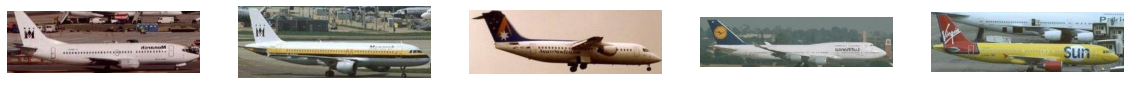

Cat


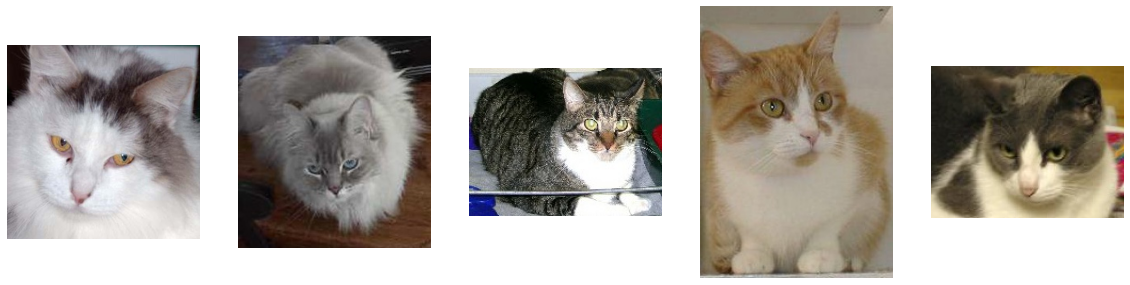

Car


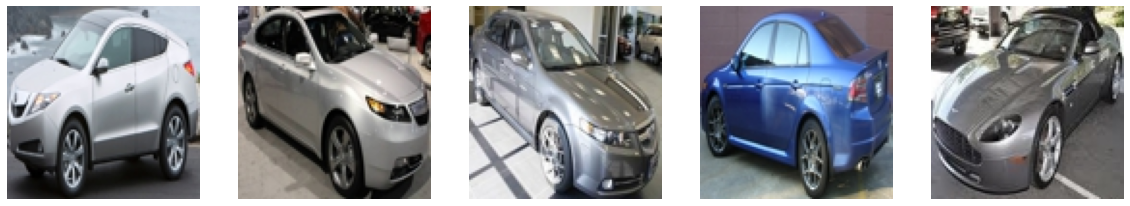

Dog


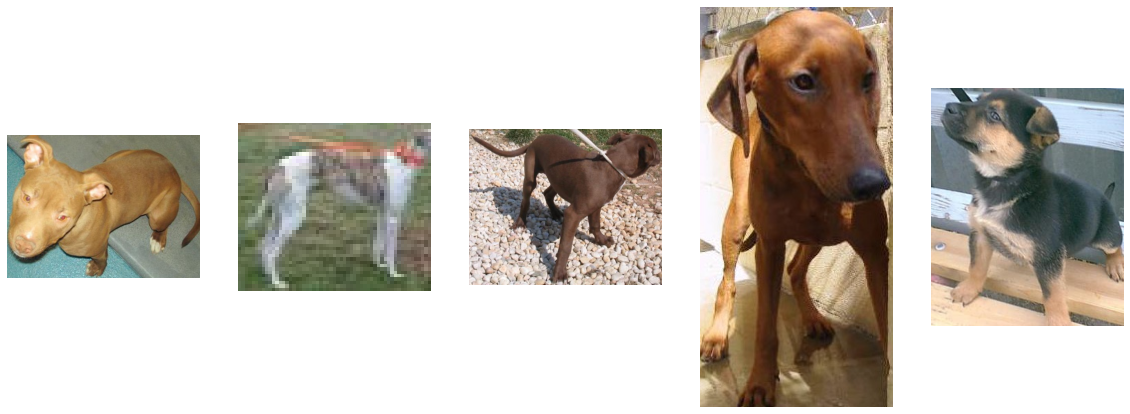

Flower


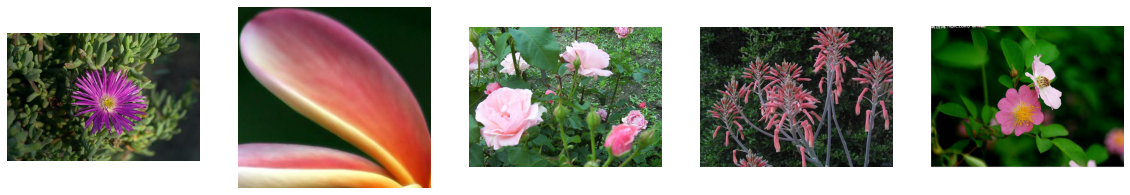

In [7]:
print('Airplane')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'airplane/' + os.listdir(home_path + 'airplane/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

print('Cat')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'cat/' + os.listdir(home_path + 'cat/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()


print('Car')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'car/' + os.listdir(home_path + 'car/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()


print('Dog')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'dog/' + os.listdir(home_path + 'dog/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()


print('Flower')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'flower/' + os.listdir(home_path + 'flower/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

Fruit


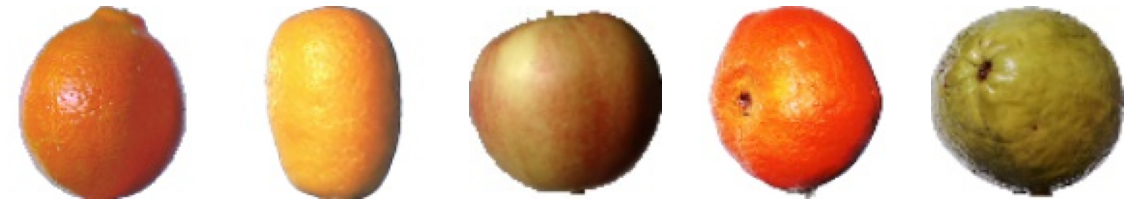

Motorbike


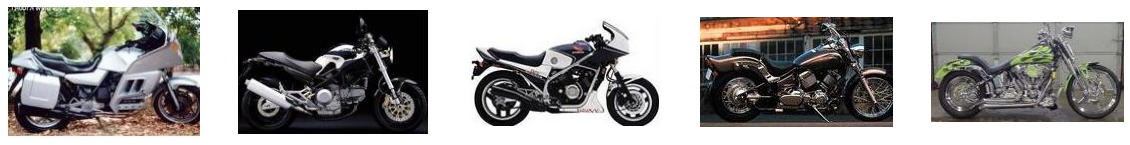

Person


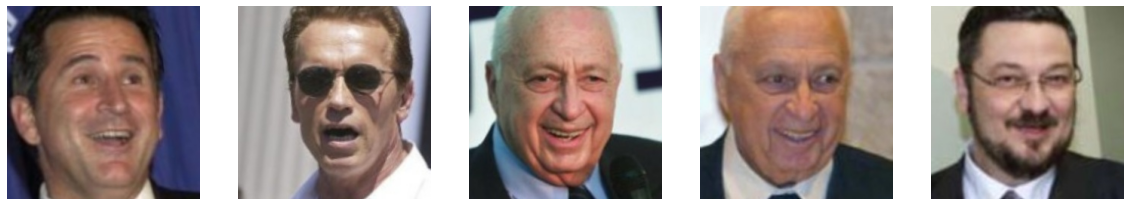

In [8]:
print('Fruit')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'fruit/' + os.listdir(home_path + 'fruit/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()


print('Motorbike')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'motorbike/' + os.listdir(home_path + 'motorbike/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()


print('Person')
plt.figure(figsize=[20,8])
for i in range(5):
    img = cv2.imread(home_path + 'person/' + os.listdir(home_path + 'person/')[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

# Configuration

In [9]:
# standard values
BATCH_SIZE = 32

IMG_SIZE = 128
EPOCHS = 12

## Data Generation

In [10]:
#data split into train and validate
train_files, val_files, train_labels, val_labels = train_test_split(files_paths, files_labels, test_size=0.15, random_state=42)

# Data Augmentation

In [11]:
# augmentation values
ROT_ = 180.0
SHR_ = 2.0
HZOOM_ = 8.0
WZOOM_ = 8.0
HSHIFT_ = 8.0
WSHIFT_ = 8.0

In [12]:
def get_mat(rotation, shear, height_zoom, width_zoom, height_shift, width_shift):
    # returns 3x3 transformmatrix which transforms indicies
        
    # CONVERT DEGREES TO RADIANS
    rotation = math.pi * rotation / 180.
    shear    = math.pi * shear    / 180.

    def get_3x3_mat(lst):
        return tf.reshape(tf.concat([lst],axis=0), [3,3])
    
    # ROTATION MATRIX
    c1   = tf.math.cos(rotation)
    s1   = tf.math.sin(rotation)
    one  = tf.constant([1],dtype='float32')
    zero = tf.constant([0],dtype='float32')
    
    rotation_matrix = get_3x3_mat([c1,   s1,   zero, 
                                   -s1,  c1,   zero, 
                                   zero, zero, one])
    
    # SHEAR MATRIX
    c2 = tf.math.cos(shear)
    s2 = tf.math.sin(shear)    
    
    shear_matrix = get_3x3_mat([one,  s2,   zero, 
                                zero, c2,   zero, 
                                zero, zero, one])        
    # ZOOM MATRIX
    zoom_matrix = get_3x3_mat([one/height_zoom, zero,           zero, 
                               zero,            one/width_zoom, zero, 
                               zero,            zero,           one])    
    # SHIFT MATRIX
    shift_matrix = get_3x3_mat([one,  zero, height_shift, 
                                zero, one,  width_shift, 
                                zero, zero, one])
    
    return K.dot(K.dot(rotation_matrix, shear_matrix), 
                 K.dot(zoom_matrix,     shift_matrix))

In [13]:
def transform(image, DIM=256):    
    # input image - is one image of size [dim,dim,3] not a batch of [b,dim,dim,3]
    # output - image randomly rotated, sheared, zoomed, and shifted
    XDIM = DIM%2 #fix for size 331
    
    rot = ROT_ * tf.random.normal([1], dtype='float32')
    shr = SHR_ * tf.random.normal([1], dtype='float32') 
    h_zoom = 1.0 + tf.random.normal([1], dtype='float32') / HZOOM_
    w_zoom = 1.0 + tf.random.normal([1], dtype='float32') / WZOOM_
    h_shift = HSHIFT_ * tf.random.normal([1], dtype='float32') 
    w_shift = WSHIFT_ * tf.random.normal([1], dtype='float32') 

    # GET TRANSFORMATION MATRIX
    m = get_mat(rot,shr,h_zoom,w_zoom,h_shift,w_shift) 

    # LIST DESTINATION PIXEL INDICES
    x   = tf.repeat(tf.range(DIM//2, -DIM//2,-1), DIM)
    y   = tf.tile(tf.range(-DIM//2, DIM//2), [DIM])
    z   = tf.ones([DIM*DIM], dtype='int32')
    idx = tf.stack( [x,y,z] )
    # ROTATE DESTINATION PIXELS ONTO ORIGIN PIXELS
    idx2 = K.dot(m, tf.cast(idx, dtype='float32'))
    idx2 = K.cast(idx2, dtype='int32')
    idx2 = K.clip(idx2, -DIM//2+XDIM+1, DIM//2)
    
    # FIND ORIGIN PIXEL VALUES           
    idx3 = tf.stack([DIM//2-idx2[0,], DIM//2-1+idx2[1,]])
    d    = tf.gather_nd(image, tf.transpose(idx3))
        
    return tf.reshape(d,[DIM, DIM,3])

In [14]:
def prepare_data(img, augment, dim):
    
    img = tf.io.read_file(img)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [dim, dim])
    img = tf.cast(img, tf.float32) / 255.
    
    if augment:
        img = transform(img, 128)
        img = tf.image.random_brightness(img, 0.1)
        img = tf.image.random_flip_left_right(img)
    
    img = tf.reshape(img, [dim, dim, 3])
    
    return img

In [15]:
def get_dataset(files, labels, shuffle=False, augment=False, repeat=False):
    data = tf.data.Dataset.from_tensor_slices((files, labels))
    
    data.cache()
    
    if repeat:
        data = data.repeat()
    
    if shuffle:
        data = data.shuffle(1024*3)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        data = data.with_options(opt)
    
    data = data.map(lambda img, target: (prepare_data(img, augment, IMG_SIZE), target))
    
    data = data.batch(BATCH_SIZE)
    data = data.prefetch(1)
    return data

# Show Augmentations

In [16]:
def show_dataset(thumb_size, cols, rows, ds):
    mosaic = PIL.Image.new(mode='RGB', size=(thumb_size*cols + (cols-1), 
                                             thumb_size*rows + (rows-1)))
   
    for idx, data in enumerate(iter(ds)):
        img, target_or_imgid = data
        ix  = idx % cols
        iy  = idx // cols
        img = np.clip(img.numpy() * 255, 0, 255).astype(np.uint8)
        img = PIL.Image.fromarray(img)
        img = img.resize((thumb_size, thumb_size), resample=PIL.Image.BILINEAR)
        mosaic.paste(img, (ix*thumb_size + ix, 
                           iy*thumb_size + iy))

    display(mosaic)

<TakeDataset shapes: ((128, 128, 3), (8,)), types: (tf.float32, tf.int64)>


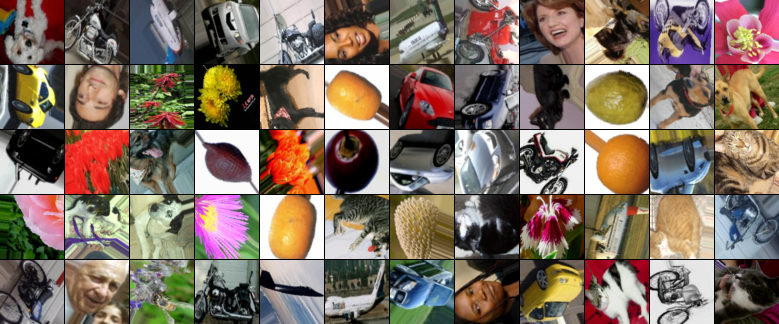

In [17]:
ds = get_dataset(train_files, train_labels, repeat=True, shuffle=True, augment=True).unbatch().take(12*5) 
print(ds)
show_dataset(thumb_size=64, cols=12, rows=5, ds=ds)

# Get Final Data

In [18]:
train_dataset = get_dataset(train_files, train_labels, shuffle=True, repeat=True, augment=True)
valid_dataset = get_dataset(val_files, val_labels)

In [19]:
# calculating steps per epoch
STEPS = len(train_files)//BATCH_SIZE
STEPS

183

# Modeling

In [20]:
# CNN Model
def build_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=[IMG_SIZE, IMG_SIZE, 3]))
    model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(2,2))
    
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPool2D(2,2))
    
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(8, activation='softmax'))
    return model

In [21]:
# compiling model
model = build_model()
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy', 'accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        2

## Callbacks

In [23]:
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')
checkpoint = tf.keras.callbacks.ModelCheckpoint('Nature image classification,h5', save_best_only=True, save_weights_only=True,
                                               save_freq='epoch', monitor='val_loss')

# Train Model

In [24]:
history = model.fit(train_dataset, epochs=EPOCHS, callbacks=[lr_reduce, checkpoint], steps_per_epoch=STEPS,
                   validation_data=valid_dataset, verbose=1)

Epoch 1/12
183/183 [==============================] - 20s 111ms/step - loss: 1.9624 - categorical_accuracy: 0.3340 - accuracy: 0.3340 - val_loss: 3.4212 - val_categorical_accuracy: 0.1053 - val_accuracy: 0.1053
Epoch 2/12
183/183 [==============================] - 13s 72ms/step - loss: 1.3377 - categorical_accuracy: 0.5135 - accuracy: 0.5135 - val_loss: 2.7058 - val_categorical_accuracy: 0.2879 - val_accuracy: 0.2879
Epoch 3/12
183/183 [==============================] - ETA: 0s - loss: 1.0796 - categorical_accuracy: 0.5893 - accuracy: 0.5893
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
183/183 [==============================] - 11s 62ms/step - loss: 1.0796 - categorical_accuracy: 0.5893 - accuracy: 0.5893 - val_loss: 0.7681 - val_categorical_accuracy: 0.7256 - val_accuracy: 0.7256
Epoch 4/12
183/183 [==============================] - 11s 62ms/step - loss: 0.8751 - categorical_accuracy: 0.6673 - accuracy: 0.6673 - val_loss: 1.3456 - val_categorical_acc

# Model History

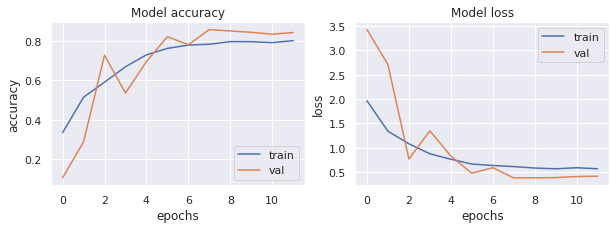

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])